In [7]:

from src.scraping.googlescraping import DriverInit, ReviewScraper
from src.cleaning import ReviewCleaner
from src.translation import ReviewTranslator


In [ ]:
driver_init.close_browser()

In [8]:
url = 'https://www.google.com/search?rlz=1C1GCEA_enHR1085HR1085&q=Casablanca%20Reviews&rflfq=1&num=20&stick=H4sIAAAAAAAAAONgkxI2sTQzMjUzsDC2NDUzMTMzN7W03MDI-IpRyDmxODEpJzEvOVEhKLUsM7W8eBErFkEAULFNy0QAAAA&rldimm=4962560839564667599&tbm=lcl&hl=en&sa=X&ved=0CAYQ5foLahcKEwiAzYbJzIKEAxUAAAAAHQAAAAAQCg&biw=1536&bih=729&dpr=1.25#lkt=LocalPoiReviews&arid=ChZDSUhNMG9nS0VJQ0FnSURSNWJlRUhnEAE'

In [9]:
driver_init = DriverInit()
driver_init.navigate_to_url(url) #improve review searching so it's usable for more places

In [ ]:
driver_init.navigate_to_reviews_tab() #fix xpath

In [10]:
review_scraper = ReviewScraper(driver_init)

In [12]:
review_scraper.load_reviews()


KeyboardInterrupt



In [ ]:
review_scraper.click_translate_buttons()

In [ ]:
review_scraper.click_more_buttons()

In [ ]:
review_scraper.collect_reviews()

In [ ]:
review_scraper.save_reviews_to_csv()

In [2]:
cleaner = ReviewCleaner()

In [3]:
input_file_path = '../data/raw/reviews_and_ratings.csv'
output_file_path = '../data/processed/reviews_and_ratings_cleaned.csv'
cleaner.clean_csv_file(input_file_path, output_file_path, remove_emojis=True)

'../data/processed/reviews_and_ratings_cleaned_no_emojis.csv'

In [4]:
translator = ReviewTranslator()

In [5]:
input_file_path = '../data/processed/reviews_and_ratings_cleaned_no_emojis.csv'
output_file_path = '../data/processed/reviews_and_ratings_translated.csv'
translator.translate_csv_file(input_file_path, output_file_path)

Translated file saved to: ../data/processed/reviews_and_ratings_translated_no_emojis.csv


In [7]:
%%sql
SELECT * FROM reviews_and_ratings_translated_no_emojis;

,translated_review,rating
0,Odličan restoran s klasičnim hrvatskim dodirom...,5
1,"Gostoljubiva, ljubazna, dobra hrana, velika vr...",5
2,Razumna cijena.!Lijep ambijent naručio kozice ...,5
3,Okus u redu.Vrlo čist restoran,4
4,"Bilo je to savršeno dobro ugodno vjenčanje, pu...",5
...,...,...
202,NAJBOLJI RESTORAN U ZAGREBU,5
203,Preporuka za otići na gablec,5
204,Dobar restoran po povoljnim cijenama.,4
205,Parkirno mjesto puno mogućnosti parkiranja na ...,5


In [ ]:
#placeholder

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


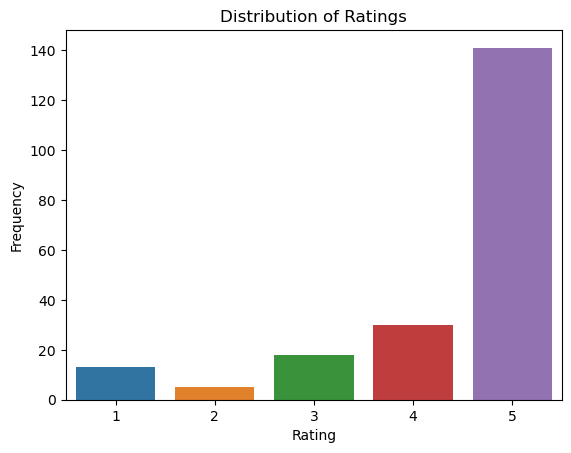

In [9]:
# This is assuming that the SQL cell execution has provided a DataFrame named 'df'

import matplotlib.pyplot as plt
import seaborn as sns

# For example, to plot the distribution of ratings from the DataFrame 'df'
sns.countplot(x='rating', data=df_sql1)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


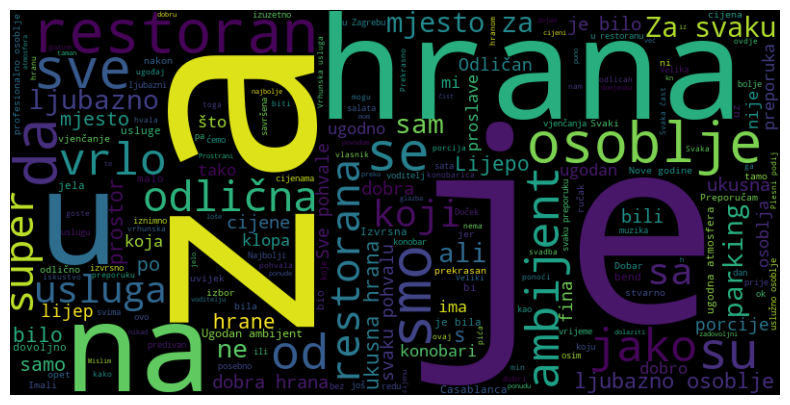

In [12]:
from wordcloud import WordCloud

# Assuming 'df' has a column 'review' that contains text data
text = ' '.join(df_sql1['translated_review'].astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
